In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

CUTOFF = 0.5

In [2]:
aggregated_data = pd.read_csv("aggregated_data.csv")
aggregated_data.head()

,Unnamed: 0,Player,Season,AS,Age,Pos,Tm,G,GS,MP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,10,Aaron Brooks,2009,0,24,PG,80,80,35,25.0,...,0.866000,0.400000,1.600000,2.000000,3.000000,0.600000,0.100000,1.600000,1.900000,11.200000
1,28,Aaron Gray,2009,0,24,C,56,56,18,12.8,...,0.576000,1.500000,2.400000,3.900000,0.800000,0.300000,0.300000,0.700000,2.400000,3.500000
2,54,Acie Law,2009,0,24,PG,55,55,1,10.2,...,0.817000,0.100000,0.900000,1.100000,1.600000,0.200000,0.100000,0.500000,0.800000,2.900000
3,59,Adam Morrison,2009,0,24,SF,52,104,10,34.4,...,0.730346,0.342308,1.211538,1.503846,0.811538,0.184615,0.092308,0.626923,1.507692,4.003846
4,72,Al Harrington,2009,0,28,PF,73,146,112,103.1,...,0.788089,1.373973,4.902055,6.226027,1.420548,1.206849,0.289726,2.219178,3.089726,20.115753


In [3]:
data = aggregated_data.drop(columns=['Unnamed: 0'])
data.head()

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Brooks,2009,0,24,PG,80,80,35,25.0,4.000000,...,0.866000,0.400000,1.600000,2.000000,3.000000,0.600000,0.100000,1.600000,1.900000,11.200000
1,Aaron Gray,2009,0,24,C,56,56,18,12.8,1.400000,...,0.576000,1.500000,2.400000,3.900000,0.800000,0.300000,0.300000,0.700000,2.400000,3.500000
2,Acie Law,2009,0,24,PG,55,55,1,10.2,0.900000,...,0.817000,0.100000,0.900000,1.100000,1.600000,0.200000,0.100000,0.500000,0.800000,2.900000
3,Adam Morrison,2009,0,24,SF,52,104,10,34.4,1.507692,...,0.730346,0.342308,1.211538,1.503846,0.811538,0.184615,0.092308,0.626923,1.507692,4.003846
4,Al Harrington,2009,0,28,PF,73,146,112,103.1,7.300685,...,0.788089,1.373973,4.902055,6.226027,1.420548,1.206849,0.289726,2.219178,3.089726,20.115753


In [4]:
data.columns

Index(['Player', 'Season', 'AS', 'Age', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FGP', 'three_P', 'three_PA', 'three_PP', 'two_P', 'two_PA',
       'two_PP', 'eFGP', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [5]:
# data = data.rename(columns={"3P": "three_P", "3PA": "three_PA", "3PP": "three_PP", "2P": "two_P", "2PA": "two_PA", "2PP": "two_PP"})
data.columns

Index(['Player', 'Season', 'AS', 'Age', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FGP', 'three_P', 'three_PA', 'three_PP', 'two_P', 'two_PA',
       'two_PP', 'eFGP', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [6]:
data.groupby(by="Season").sum()["AS"]

Season
2009    26
2010    28
2011    23
2012    25
2013    24
2014    25
2015    28
2016    26
2017    25
2018    28
2019    27
2020    24
2021    27
2022    27
2023    27
Name: AS, dtype: int64

In [7]:
train_data = data[data["Season"] % 3 != 1]
train_data

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Brooks,2009,0,24,PG,80,80,35,25.0,4.000000,...,0.866000,0.400000,1.600000,2.000000,3.000000,0.600000,0.100000,1.600000,1.900000,11.200000
1,Aaron Gray,2009,0,24,C,56,56,18,12.8,1.400000,...,0.576000,1.500000,2.400000,3.900000,0.800000,0.300000,0.300000,0.700000,2.400000,3.500000
2,Acie Law,2009,0,24,PG,55,55,1,10.2,0.900000,...,0.817000,0.100000,0.900000,1.100000,1.600000,0.200000,0.100000,0.500000,0.800000,2.900000
3,Adam Morrison,2009,0,24,SF,52,104,10,34.4,1.507692,...,0.730346,0.342308,1.211538,1.503846,0.811538,0.184615,0.092308,0.626923,1.507692,4.003846
4,Al Harrington,2009,0,28,PF,73,146,112,103.1,7.300685,...,0.788089,1.373973,4.902055,6.226027,1.420548,1.206849,0.289726,2.219178,3.089726,20.115753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,Nikola Jokic,2022,1,26,C,74,74,74,33.5,10.300000,...,0.810000,2.800000,11.000000,13.800000,7.900000,1.500000,0.900000,3.800000,2.600000,27.100000
5849,Rudy Gobert,2022,1,29,C,66,66,66,32.1,5.500000,...,0.690000,3.700000,11.000000,14.700000,1.100000,0.700000,2.100000,1.800000,2.700000,15.600000
5850,Stephen Curry,2022,1,33,PG,64,64,64,34.5,8.400000,...,0.923000,0.500000,4.700000,5.200000,6.300000,1.300000,0.400000,3.200000,2.000000,25.500000
5851,Trae Young,2022,1,23,PG,76,76,76,34.9,9.400000,...,0.904000,0.700000,3.100000,3.700000,9.700000,0.900000,0.100000,4.000000,1.700000,28.400000


In [8]:
test_data = data[data["Season"] % 3 == 1]
test_data

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
712,A.J. Price,2011,0,24,PG,50,50,0,15.9,2.300000,...,0.667000,0.300000,1.100000,1.400000,2.200000,0.600000,0.000000,1.100000,1.200000,6.500000
713,Aaron Brooks,2011,0,26,PG,59,118,24,64.6,3.694068,...,0.884822,0.321186,0.994068,1.315254,3.934746,0.578814,0.078814,1.692373,1.907627,10.726271
714,Acie Law,2011,0,26,PG,51,102,0,38.5,1.616667,...,0.729353,0.210784,1.006863,1.217647,1.646078,0.617647,0.000000,0.810784,1.206863,4.218627
715,Al Harrington,2011,0,30,PF,73,73,3,22.8,3.800000,...,0.735000,1.000000,3.500000,4.500000,1.400000,0.500000,0.100000,1.500000,2.800000,10.500000
716,Al Thornton,2011,0,27,PF,71,142,46,55.6,2.876056,...,0.777155,0.788028,2.184507,3.007042,0.872535,0.503521,0.184507,0.900000,2.003521,7.390141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,Rudy Gobert,2023,0,30,C,54,54,54,30.4,5.200000,...,0.661000,3.200000,8.400000,11.600000,0.900000,0.800000,1.400000,1.700000,3.000000,13.600000
6296,Stephen Curry,2023,1,34,PG,39,39,39,34.5,9.700000,...,0.925000,0.600000,5.700000,6.200000,6.400000,1.000000,0.400000,3.200000,2.200000,29.400000
6297,Trae Young,2023,0,24,PG,57,57,57,35.1,8.400000,...,0.890000,0.800000,2.300000,3.000000,10.100000,1.100000,0.200000,4.100000,1.500000,26.700000
6298,Zach LaVine,2023,0,27,SG,61,61,61,36.0,8.500000,...,0.844000,0.500000,4.200000,4.700000,4.000000,0.900000,0.200000,2.600000,2.200000,24.700000


In [9]:
test_2023 = data[data["Season"] == 2023]
test_2020 = data[data["Season"] == 2020]
test_2017 = data[data["Season"] == 2017]
test_2014 = data[data["Season"] == 2014]
test_2011 = data[data["Season"] == 2011]

true_2023_as = test_2023.loc[test_2023['AS'] == 1, 'Player'].to_numpy()
true_2023_as_count = len(true_2023_as)
true_2020_as = test_2020.loc[test_2020['AS'] == 1, 'Player'].to_numpy()
true_2020_as_count = len(true_2020_as)
true_2017_as = test_2017.loc[test_2017['AS'] == 1, 'Player'].to_numpy()
true_2017_as_count = len(true_2017_as)
true_2014_as = test_2014.loc[test_2014['AS'] == 1, 'Player'].to_numpy()
true_2014_as_count = len(true_2014_as)
true_2011_as = test_2011.loc[test_2011['AS'] == 1, 'Player'].to_numpy()
true_2011_as_count = len(true_2011_as)
print(true_2023_as_count, true_2020_as_count, true_2017_as_count, true_2014_as_count, true_2011_as_count)

27 24 25 25 23


In [10]:
test_2023

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5853,A.J. Green,2023,0,23,SG,30,30,0,9.7,1.6,...,1.000,0.2,1.0,1.2,0.6,0.2,0.0,0.3,1.0,4.6
5854,AJ Griffin,2023,0,19,SF,59,59,11,19.8,3.5,...,0.875,0.4,1.6,2.0,1.0,0.7,0.1,0.6,1.2,8.9
5855,Aaron Gordon,2023,0,27,PF,52,52,52,30.0,6.5,...,0.627,2.4,4.4,6.8,2.9,0.8,0.8,1.6,1.9,16.9
5856,Aaron Holiday,2023,0,26,PG,52,52,5,14.0,1.5,...,0.857,0.4,0.9,1.3,1.3,0.5,0.2,0.6,1.3,4.1
5857,Aaron Nesmith,2023,0,23,SF,57,57,45,24.4,3.3,...,0.864,0.8,2.9,3.7,1.2,0.8,0.4,0.9,3.4,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,Rudy Gobert,2023,0,30,C,54,54,54,30.4,5.2,...,0.661,3.2,8.4,11.6,0.9,0.8,1.4,1.7,3.0,13.6
6296,Stephen Curry,2023,1,34,PG,39,39,39,34.5,9.7,...,0.925,0.6,5.7,6.2,6.4,1.0,0.4,3.2,2.2,29.4
6297,Trae Young,2023,0,24,PG,57,57,57,35.1,8.4,...,0.890,0.8,2.3,3.0,10.1,1.1,0.2,4.1,1.5,26.7
6298,Zach LaVine,2023,0,27,SG,61,61,61,36.0,8.5,...,0.844,0.5,4.2,4.7,4.0,0.9,0.2,2.6,2.2,24.7


Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.

In [11]:
predictors = train_data.drop(["Player", "Season", "AS"], axis=1)
predictors.head()

,Age,Pos,Tm,G,GS,MP,FG,FGA,FGP,three_P,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,24,PG,80,80,35,25.0,4.000000,9.800000,0.404000,1.400000,...,0.866000,0.400000,1.600000,2.000000,3.000000,0.600000,0.100000,1.600000,1.900000,11.200000
1,24,C,56,56,18,12.8,1.400000,3.000000,0.485000,0.000000,...,0.576000,1.500000,2.400000,3.900000,0.800000,0.300000,0.300000,0.700000,2.400000,3.500000
2,24,PG,55,55,1,10.2,0.900000,2.500000,0.374000,0.200000,...,0.817000,0.100000,0.900000,1.100000,1.600000,0.200000,0.100000,0.500000,0.800000,2.900000
3,24,SF,52,104,10,34.4,1.507692,4.296154,0.357423,0.603846,...,0.730346,0.342308,1.211538,1.503846,0.811538,0.184615,0.092308,0.626923,1.507692,4.003846
4,28,PF,73,146,112,103.1,7.300685,16.604110,0.438493,2.343151,...,0.788089,1.373973,4.902055,6.226027,1.420548,1.206849,0.289726,2.219178,3.089726,20.115753


In [12]:
predictors.corr()

,Age,Tm,G,GS,MP,FG,FGA,FGP,three_P,three_PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.066930,0.109400,0.073597,0.138803,0.034770,0.038658,0.004957,0.110923,0.097115,...,0.120763,-0.044439,0.065035,0.033814,0.107213,0.035845,-0.019803,0.022574,0.034395,0.043306
Tm,0.066930,1.000000,0.801096,0.556604,0.333393,0.460451,0.432291,0.340485,0.267111,0.234424,...,0.195518,0.292812,0.415007,0.401107,0.289914,0.383499,0.254570,0.366501,0.465884,0.447882
G,0.109400,0.801096,1.000000,0.547137,0.716079,0.338052,0.326470,0.226349,0.224854,0.203997,...,0.177718,0.195998,0.294851,0.281316,0.223632,0.292675,0.153515,0.276371,0.343996,0.331143
GS,0.073597,0.556604,0.547137,1.000000,0.629133,0.692567,0.676933,0.259247,0.359519,0.348810,...,0.160540,0.379858,0.606563,0.571108,0.488176,0.563100,0.357321,0.603284,0.544532,0.679294
MP,0.138803,0.333393,0.716079,0.629133,1.000000,0.488970,0.510791,0.102612,0.343901,0.353973,...,0.187440,0.183274,0.373969,0.335999,0.380457,0.427367,0.155922,0.447055,0.378570,0.492628
FG,0.034770,0.460451,0.338052,0.692567,0.488970,1.000000,0.976798,0.361517,0.509941,0.510245,...,0.268428,0.402091,0.706068,0.651723,0.626890,0.628918,0.381999,0.812853,0.584593,0.988032
FGA,0.038658,0.432291,0.326470,0.676933,0.510791,0.976798,1.000000,0.197499,0.595298,0.613714,...,0.307157,0.295046,0.638204,0.567112,0.661756,0.649847,0.290167,0.826145,0.553233,0.980456
FGP,0.004957,0.340485,0.226349,0.259247,0.102612,0.361517,0.197499,1.000000,-0.111563,-0.180131,...,-0.044419,0.531971,0.442429,0.498556,0.059201,0.146189,0.455336,0.193998,0.382202,0.304967
three_P,0.110923,0.267111,0.224854,0.359519,0.343901,0.509941,0.595298,-0.111563,1.000000,0.980518,...,0.379379,-0.241574,0.169316,0.047443,0.418853,0.400313,-0.111966,0.383180,0.192963,0.581157
three_PA,0.097115,0.234424,0.203997,0.348810,0.353973,0.510245,0.613714,-0.180131,0.980518,1.000000,...,0.371322,-0.252948,0.167448,0.042483,0.440981,0.417119,-0.120881,0.406946,0.194701,0.582689


In [13]:
corr_matrix = train_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

to_drop


C:\Users\msbow\AppData\Local\Temp\ipykernel_19816\2058914866.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['G',
 'MP',
 'FGA',
 'three_PA',
 'two_P',
 'two_PA',
 'two_PP',
 'eFGP',
 'FT',
 'FTA',
 'DRB',
 'TRB',
 'BLK',
 'TOV',
 'PTS']

In [14]:
corr_matrix = train_data.corr().abs()
high_corr_var=np.where(corr_matrix>0.7)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('Tm', 'G'),
 ('G', 'MP'),
 ('FG', 'FGA'),
 ('FG', 'two_P'),
 ('FG', 'two_PA'),
 ('FG', 'FT'),
 ('FG', 'FTA'),
 ('FG', 'DRB'),
 ('FG', 'TOV'),
 ('FG', 'PTS'),
 ('FGA', 'two_P'),
 ('FGA', 'two_PA'),
 ('FGA', 'FT'),
 ('FGA', 'FTA'),
 ('FGA', 'TOV'),
 ('FGA', 'PTS'),
 ('FGP', 'two_PP'),
 ('FGP', 'eFGP'),
 ('three_P', 'three_PA'),
 ('two_P', 'two_PA'),
 ('two_P', 'FT'),
 ('two_P', 'FTA'),
 ('two_P', 'DRB'),
 ('two_P', 'TRB'),
 ('two_P', 'TOV'),
 ('two_P', 'PTS'),
 ('two_PA', 'FT'),
 ('two_PA', 'FTA'),
 ('two_PA', 'TOV'),
 ('two_PA', 'PTS'),
 ('two_PP', 'eFGP'),
 ('FT', 'FTA'),
 ('FT', 'TOV'),
 ('FT', 'PTS'),
 ('FTA', 'TOV'),
 ('FTA', 'PTS'),
 ('ORB', 'DRB'),
 ('ORB', 'TRB'),
 ('DRB', 'TRB'),
 ('TRB', 'BLK'),
 ('AST', 'TOV'),
 ('TOV', 'PTS')]

In [15]:
predictors.columns

Index(['Age', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FGP', 'three_P',
       'three_PA', 'three_PP', 'two_P', 'two_PA', 'two_PP', 'eFGP', 'FT',
       'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

In [16]:
logit_model_including_all = sm.logit(formula = 'AS~'+'+'.join(predictors.columns), data = train_data).fit() #Developing logistic regression model
logit_model_including_all.summary()

Optimization terminated successfully.
         Current function value: 0.068906
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     AS   No. Observations:                 4201
Model:                          Logit   Df Residuals:                     4169
Method:                           MLE   Df Model:                           31
Date:                Tue, 07 Mar 2023   Pseudo R-squ.:                  0.7080
Time:                        14:43:03   Log-Likelihood:                -289.47
converged:                       True   LL-Null:                       -991.44
Covariance Type:            nonrobust   LLR p-value:                7.827e-276
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.7608      6.028     -3.113      0.002     -30.575      -6.947
Pos[T.PF]      0.3512      0.413      0.851      0.395      -0.458       1.160
Pos[T.PG]      0.5304      0.726      0.731      0.465      -0.892       1.953
Pos[T.SF]      0.0456      0.579      0.079      0.937      -1.090       1.181
Pos[T.SG]      0.1674      0.664      0.252      0.801      -1.133       1.468
Age            0.1951      0.033      5.979      0.000       0.131       0.259
Tm             0.1080      0.034      3.160      0.002       0.041       0.175
G             -0.1119      0.036     -3.135      0.002      -0.182      -0.042
GS             0.0468      0.019      2.490      0.013       0.010       0.084
MP             0.0445      0.029      1.524      0.128      -0.013       0.102
FG             7.4623      3.506      2.129      0.033       0.591      14.333
FGA           -0.2389      2.366     -0.101      0.920      -4.875       4.397
FGP           10.9005     17.166      0.635      0.525     -22.745      44.546
three_P        6.3704      3.051      2.088      0.037       0.391      12.350
three_PA      -0.9561      2.379     -0.402      0.688      -5.618       3.706
three_PP       0.6786      1.113      0.610      0.542      -1.503       2.860
two_P          0.8124      2.364      0.344      0.731      -3.820       5.445
two_PA        -0.3204      2.387     -0.134      0.893      -4.999       4.358
two_PP       -10.2806     10.875     -0.945      0.344     -31.595      11.034
eFGP          -8.3657     16.986     -0.493      0.622     -41.658      24.926
FT             3.1254      1.641      1.904      0.057      -0.091       6.342
FTA            0.5418      0.545      0.995      0.320      -0.526       1.609
FTP            4.1824      3.780      1.106      0.269      -3.226      11.591
ORB           -0.1462      2.152     -0.068      0.946      -4.364       4.071
DRB           -0.0309      2.174     -0.014      0.989      -4.291       4.230
TRB            0.3191      2.165      0.147      0.883      -3.924       4.562
AST            0.2612      0.108      2.411      0.016       0.049       0.474
STL            0.7330      0.331      2.215      0.027       0.084       1.382
BLK            1.0583      0.313      3.382      0.001       0.445       1.672
TOV            0.3095      0.284      1.089      0.276      -0.247       0.867
PF            -1.1402      0.261     -4.373      0.000      -1.651      -0.629
PTS           -3.2657      1.577     -2.071      0.038      -6.356      -0.175
==============================================================================

Possibly complete quasi-separation: A fraction 0.56 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [17]:
pred = [p for p in predictors.columns]
reduced_predictors = [p for p in predictors if p not in to_drop]
print(reduced_predictors)
logit_model_less_corr = sm.logit(formula = 'AS~'+'+'.join(reduced_predictors), data = train_data).fit() #Developing logistic regression model
logit_model_less_corr.summary()

['Age', 'Pos', 'Tm', 'GS', 'FG', 'FGP', 'three_P', 'three_PP', 'FTP', 'ORB', 'AST', 'STL', 'PF']
Optimization terminated successfully.
         Current function value: 0.083639
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     AS   No. Observations:                 4201
Model:                          Logit   Df Residuals:                     4184
Method:                           MLE   Df Model:                           16
Date:                Tue, 07 Mar 2023   Pseudo R-squ.:                  0.6456
Time:                        14:43:03   Log-Likelihood:                -351.37
converged:                       True   LL-Null:                       -991.44
Covariance Type:            nonrobust   LLR p-value:                9.207e-263
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.5768      2.481     -9.905      0.000     -29.440     -19.714
Pos[T.PF]     -0.4629      0.338     -1.368      0.171      -1.126       0.200
Pos[T.PG]     -0.8544      0.535     -1.596      0.110      -1.904       0.195
Pos[T.SF]     -0.4279      0.456     -0.937      0.349      -1.323       0.467
Pos[T.SG]     -1.2230      0.489     -2.503      0.012      -2.180      -0.265
Age            0.1975      0.029      6.848      0.000       0.141       0.254
Tm             0.0356      0.009      3.776      0.000       0.017       0.054
GS             0.0018      0.005      0.382      0.703      -0.008       0.011
FG             1.1145      0.085     13.068      0.000       0.947       1.282
FGP            7.7926      2.728      2.857      0.004       2.447      13.138
three_P        0.2082      0.152      1.367      0.172      -0.090       0.507
three_PP       0.4588      0.934      0.491      0.623      -1.371       2.289
FTP            2.7267      1.500      1.818      0.069      -0.213       5.666
ORB            0.6295      0.189      3.338      0.001       0.260       0.999
AST            0.3907      0.074      5.274      0.000       0.246       0.536
STL            0.9999      0.297      3.365      0.001       0.417       1.582
PF            -0.5424      0.216     -2.514      0.012      -0.965      -0.120
==============================================================================

Possibly complete quasi-separation: A fraction 0.35 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve


def confusion_matrix_year(model, test_ds, as_count):
    # Assume new_data is a dataframe containing the predictor variables for the new observations
    pred_probs = model.predict(test_ds)  # Predict the probabilities of AS=1 for each observation
    pred_probs_sorted = pred_probs.sort_values(ascending=False)  # Sort the probabilities in descending order
    top_indices = pred_probs_sorted.head(as_count).index  # Get the indices of the top n observations with the highest probabilities
    predicted_classes = pd.Series(0, index=test_ds.index)  # Create a Series to store the predicted classes (0 or 1) for each observation
    predicted_classes.loc[top_indices] = 1  # Set the top n predicted classes to 1, and the rest to 0
    true_values = test_ds['AS']
    confusion = pd.DataFrame(confusion_matrix(true_values, predicted_classes))
    confusion.columns = ['Predicted 0', 'Predicted 1']
    confusion = confusion.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(confusion)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(true_values, predicted_classes)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))


Classification accuracy = 97.3%
Precision = 77.8%
TPR or Recall = 77.8%
FNR = 22.2%
FPR = 1.4%
ROC-AUC = 88.2%


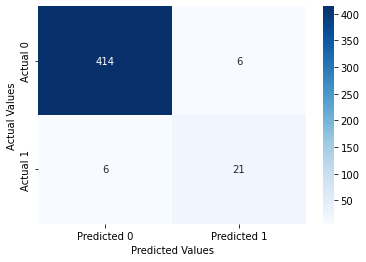

In [19]:
confusion_matrix_year(logit_model_including_all, test_2023, true_2023_as_count)

Classification accuracy = 96.6%
Precision = 66.7%
TPR or Recall = 66.7%
FNR = 33.3%
FPR = 1.8%
ROC-AUC = 82.4%


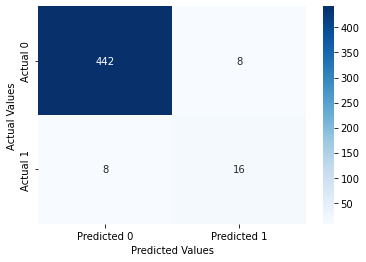

In [20]:
confusion_matrix_year(logit_model_including_all, test_2020, true_2020_as_count)

Classification accuracy = 97.2%
Precision = 76.0%
TPR or Recall = 76.0%
FNR = 24.0%
FPR = 1.5%
ROC-AUC = 87.3%


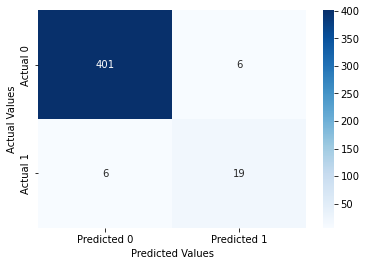

In [21]:
confusion_matrix_year(logit_model_including_all, test_2017, true_2017_as_count)

Classification accuracy = 95.9%
Precision = 68.0%
TPR or Recall = 68.0%
FNR = 32.0%
FPR = 2.2%
ROC-AUC = 82.9%


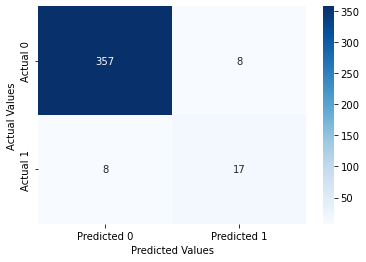

In [22]:
confusion_matrix_year(logit_model_including_all, test_2014, true_2014_as_count)

Classification accuracy = 96.1%
Precision = 69.6%
TPR or Recall = 69.6%
FNR = 30.4%
FPR = 2.1%
ROC-AUC = 83.7%


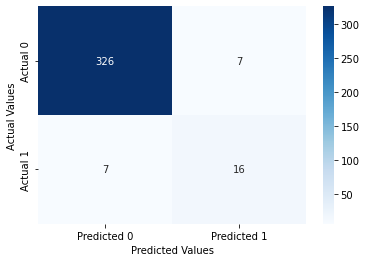

In [23]:
confusion_matrix_year(logit_model_including_all, test_2011, true_2011_as_count)

Classification accuracy

In [24]:
#Function to compute confusion matrix and prediction accuracy on training data

def confusion_matrix_train(model,cutoff=CUTOFF):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    print(cm_df)
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    


Train

        0      1
0  3890.0   45.0
1    81.0  185.0
Classification accuracy = 97.0%


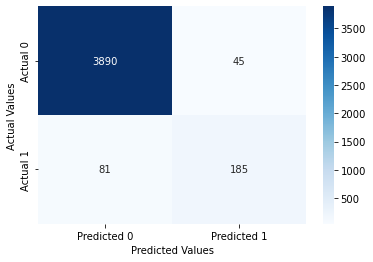

In [25]:
cm_train = confusion_matrix_train(logit_model_including_all)

The prediction accuracy was found to be 96.7% for train data.

In [26]:
#Function to compute confusion matrix and prediction accuracy on test data

def confusion_matrix_test(data,actual_values,model,cutoff=CUTOFF):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))


Test

Classification accuracy = 96.6%


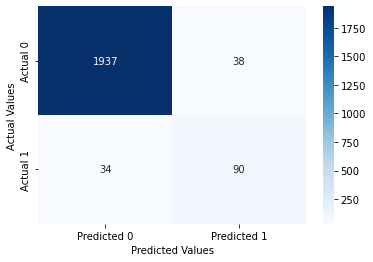

In [27]:
confusion_matrix_test(test_data,test_data.AS,logit_model_including_all)

The prediction accuracy was found to be 95.0% for test data.

Recall

What is the minimum Recall of the model among the Recall performance on train data and test data? Consider a decision threshold probability of 30% when classifying observations.

Here, Recall is the proportion of players predicted to take part in the all star team among those who actually turn out to become all stars.

Recall: Mathematically, we define recall as the number of true positives divided by the number of true positives plus the number of false negatives.

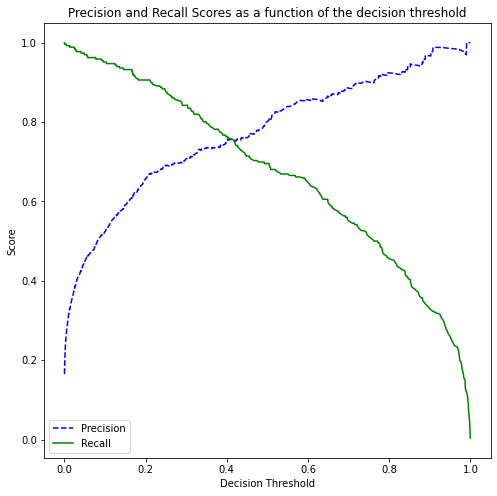

In [28]:

y = train_data.AS
ypred = logit_model_including_all.predict(train_data)
p, r, thresholds = precision_recall_curve(y, ypred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()

plot_precision_recall_vs_threshold(p, r, thresholds)

AUC:  0.9864499240477305


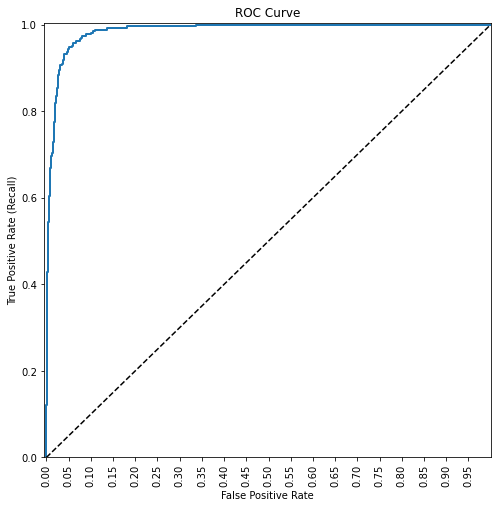

In [29]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    #plt.plot(fpr[np.argmax(net_profit_array_notperperson)+1],tpr[np.argmax(net_profit_array_notperperson)+1], marker="o")
    plt.plot([0, 1], [0, 1], 'k--')   
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print("AUC: ", auc(fpr, tpr))# AUC of ROC

plot_roc_curve(fpr, tpr)

In [30]:
#Function to compute confusion matrix and prediction accuracy on test/train data

def confusion_matrix_data(data,actual_values,model,cutoff=CUTOFF):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Train

Classification accuracy = 97.0%
Precision = 80.4%
TPR or Recall = 69.5%
FNR = 30.5%
FPR = 1.1%
ROC-AUC = 98.6%


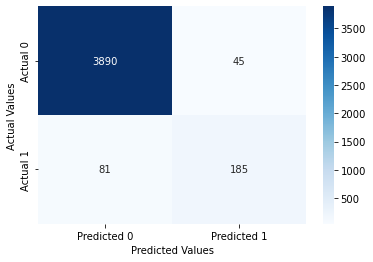

In [31]:
confusion_matrix_data(train_data,train_data.AS,logit_model_including_all,CUTOFF)

Test

Classification accuracy = 96.6%
Precision = 70.3%
TPR or Recall = 72.6%
FNR = 27.4%
FPR = 1.9%
ROC-AUC = 98.4%


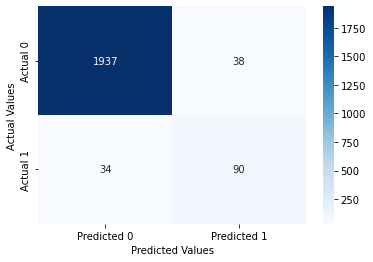

In [32]:
confusion_matrix_data(test_data,test_data.AS,logit_model_including_all,CUTOFF)

Model Improvement (Variable Selection Methods to increase interpretability) 

In [33]:
predictors

,Age,Pos,Tm,G,GS,MP,FG,FGA,FGP,three_P,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,24,PG,80,80,35,25.0,4.000000,9.800000,0.404000,1.400000,...,0.866000,0.400000,1.600000,2.000000,3.000000,0.600000,0.100000,1.600000,1.900000,11.200000
1,24,C,56,56,18,12.8,1.400000,3.000000,0.485000,0.000000,...,0.576000,1.500000,2.400000,3.900000,0.800000,0.300000,0.300000,0.700000,2.400000,3.500000
2,24,PG,55,55,1,10.2,0.900000,2.500000,0.374000,0.200000,...,0.817000,0.100000,0.900000,1.100000,1.600000,0.200000,0.100000,0.500000,0.800000,2.900000
3,24,SF,52,104,10,34.4,1.507692,4.296154,0.357423,0.603846,...,0.730346,0.342308,1.211538,1.503846,0.811538,0.184615,0.092308,0.626923,1.507692,4.003846
4,28,PF,73,146,112,103.1,7.300685,16.604110,0.438493,2.343151,...,0.788089,1.373973,4.902055,6.226027,1.420548,1.206849,0.289726,2.219178,3.089726,20.115753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,26,C,74,74,74,33.5,10.300000,17.700000,0.583000,1.300000,...,0.810000,2.800000,11.000000,13.800000,7.900000,1.500000,0.900000,3.800000,2.600000,27.100000
5849,29,C,66,66,66,32.1,5.500000,7.700000,0.713000,0.000000,...,0.690000,3.700000,11.000000,14.700000,1.100000,0.700000,2.100000,1.800000,2.700000,15.600000
5850,33,PG,64,64,64,34.5,8.400000,19.100000,0.437000,4.500000,...,0.923000,0.500000,4.700000,5.200000,6.300000,1.300000,0.400000,3.200000,2.000000,25.500000
5851,23,PG,76,76,76,34.9,9.400000,20.300000,0.460000,3.100000,...,0.904000,0.700000,3.100000,3.700000,9.700000,0.900000,0.100000,4.000000,1.700000,28.400000


In [34]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_predictors = predictors.select_dtypes(include=numerics)
numeric_predictors

,Age,Tm,G,GS,MP,FG,FGA,FGP,three_P,three_PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,24,80,80,35,25.0,4.000000,9.800000,0.404000,1.400000,3.900000,...,0.866000,0.400000,1.600000,2.000000,3.000000,0.600000,0.100000,1.600000,1.900000,11.200000
1,24,56,56,18,12.8,1.400000,3.000000,0.485000,0.000000,0.000000,...,0.576000,1.500000,2.400000,3.900000,0.800000,0.300000,0.300000,0.700000,2.400000,3.500000
2,24,55,55,1,10.2,0.900000,2.500000,0.374000,0.200000,0.500000,...,0.817000,0.100000,0.900000,1.100000,1.600000,0.200000,0.100000,0.500000,0.800000,2.900000
3,24,52,104,10,34.4,1.507692,4.296154,0.357423,0.603846,1.826923,...,0.730346,0.342308,1.211538,1.503846,0.811538,0.184615,0.092308,0.626923,1.507692,4.003846
4,28,73,146,112,103.1,7.300685,16.604110,0.438493,2.343151,6.419178,...,0.788089,1.373973,4.902055,6.226027,1.420548,1.206849,0.289726,2.219178,3.089726,20.115753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,26,74,74,74,33.5,10.300000,17.700000,0.583000,1.300000,3.900000,...,0.810000,2.800000,11.000000,13.800000,7.900000,1.500000,0.900000,3.800000,2.600000,27.100000
5849,29,66,66,66,32.1,5.500000,7.700000,0.713000,0.000000,0.100000,...,0.690000,3.700000,11.000000,14.700000,1.100000,0.700000,2.100000,1.800000,2.700000,15.600000
5850,33,64,64,64,34.5,8.400000,19.100000,0.437000,4.500000,11.700000,...,0.923000,0.500000,4.700000,5.200000,6.300000,1.300000,0.400000,3.200000,2.000000,25.500000
5851,23,76,76,76,34.9,9.400000,20.300000,0.460000,3.100000,8.000000,...,0.904000,0.700000,3.100000,3.700000,9.700000,0.900000,0.100000,4.000000,1.700000,28.400000


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numeric_predictors = add_constant(numeric_predictors)
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_predictors.columns

for i in range(len(numeric_predictors.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(numeric_predictors.values, i)
sorted_vif = vif_data.sort_values(by="VIF", ascending=False)
print(sorted_vif)

sorted_vif[sorted_vif["VIF"] > 10]

     feature          VIF
7        FGA  9310.884489
27       PTS  6991.302331
13    two_PA  6112.649887
6         FG  4968.362104
21       TRB  2486.557596
12     two_P  1890.365928
10  three_PA  1821.727950
20       DRB  1369.732433
9    three_P   511.054201
16        FT   420.573797
19       ORB   258.979560
0      const   207.328467
17       FTA    64.908186
8        FGP    20.010758
3          G    18.988102
15      eFGP    17.341084
2         Tm    13.494429
5         MP    10.749162
25       TOV     7.688413
22       AST     4.542450
14    two_PP     4.171999
4         GS     3.246767
26        PF     2.595791
23       STL     2.445311
24       BLK     2.280016
18       FTP     1.886540
11  three_PP     1.880294
1        Age     1.099118


,feature,VIF
7,FGA,9310.884489
27,PTS,6991.302331
13,two_PA,6112.649887
6,FG,4968.362104
21,TRB,2486.557596
12,two_P,1890.365928
10,three_PA,1821.727950
20,DRB,1369.732433
9,three_P,511.054201
16,FT,420.573797


Small VIF values, VIF < 3, indicate low correlation among variables under ideal conditions. The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. However, note that many sources say that a VIF of less than 10 is acceptable.

FGA, PTS, two_PA, FG, TRB, two_P, three_PA, DRB all have VIF values greater than 1000 meaning that these variables are perfectly correlated with each other (perfect multicollinearity). We shouldn't have all of these variables included in the model at the same time. Having them all included in the model won't increase accuracy by much and in fact decrease interpretability and lead to incorrect inferences of the model.

Using Forward Selection

In [36]:
X = predictors.drop(["Pos"], axis=1)
X

,Age,Tm,G,GS,MP,FG,FGA,FGP,three_P,three_PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,24,80,80,35,25.0,4.000000,9.800000,0.404000,1.400000,3.900000,...,0.866000,0.400000,1.600000,2.000000,3.000000,0.600000,0.100000,1.600000,1.900000,11.200000
1,24,56,56,18,12.8,1.400000,3.000000,0.485000,0.000000,0.000000,...,0.576000,1.500000,2.400000,3.900000,0.800000,0.300000,0.300000,0.700000,2.400000,3.500000
2,24,55,55,1,10.2,0.900000,2.500000,0.374000,0.200000,0.500000,...,0.817000,0.100000,0.900000,1.100000,1.600000,0.200000,0.100000,0.500000,0.800000,2.900000
3,24,52,104,10,34.4,1.507692,4.296154,0.357423,0.603846,1.826923,...,0.730346,0.342308,1.211538,1.503846,0.811538,0.184615,0.092308,0.626923,1.507692,4.003846
4,28,73,146,112,103.1,7.300685,16.604110,0.438493,2.343151,6.419178,...,0.788089,1.373973,4.902055,6.226027,1.420548,1.206849,0.289726,2.219178,3.089726,20.115753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,26,74,74,74,33.5,10.300000,17.700000,0.583000,1.300000,3.900000,...,0.810000,2.800000,11.000000,13.800000,7.900000,1.500000,0.900000,3.800000,2.600000,27.100000
5849,29,66,66,66,32.1,5.500000,7.700000,0.713000,0.000000,0.100000,...,0.690000,3.700000,11.000000,14.700000,1.100000,0.700000,2.100000,1.800000,2.700000,15.600000
5850,33,64,64,64,34.5,8.400000,19.100000,0.437000,4.500000,11.700000,...,0.923000,0.500000,4.700000,5.200000,6.300000,1.300000,0.400000,3.200000,2.000000,25.500000
5851,23,76,76,76,34.9,9.400000,20.300000,0.460000,3.100000,8.000000,...,0.904000,0.700000,3.100000,3.700000,9.700000,0.900000,0.100000,4.000000,1.700000,28.400000


In [37]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('AS~' + '+'.join(predictor_subset),data = train_data).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [38]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [39]:
#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
# models_best = pd.DataFrame(columns=["Rsquared", "model"])

# tic = time.time()
# for i in range(1,1+X.shape[1]):
#     models_best.loc[i] = getBest_model(i)

# toc = time.time()
# print("Total elapsed time:", (toc-tic), "seconds.")

In [40]:
def best_sub_plots(models_best):
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')
    print("RSADJ.ARGMIN + 1, RSADJ.MIN: ", 1+rsquared_adj.argmax(), rsquared_adj.max() )

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')
    print("AIC.ARGMIN + 1, AIC.MIN: ", 1+aic.argmin(), aic.min() )

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
    print("BIC.ARGMIN + 1, BIC.MIN: ", 1+bic.argmin(), bic.min() )
# best_sub_plots()

In [41]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [42]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [43]:
models_best_fw = forward_selection()

Processed  27 models on 1 predictors in 0.09607744216918945 seconds.
Processed  26 models on 2 predictors in 0.10207295417785645 seconds.
Processed  25 models on 3 predictors in 0.1143045425415039 seconds.
Processed  24 models on 4 predictors in 0.14049506187438965 seconds.
Processed  23 models on 5 predictors in 0.1436328887939453 seconds.
Processed  22 models on 6 predictors in 0.15879249572753906 seconds.
Processed  21 models on 7 predictors in 0.19147396087646484 seconds.
Processed  20 models on 8 predictors in 0.18982338905334473 seconds.
Processed  19 models on 9 predictors in 0.19294118881225586 seconds.
Processed  18 models on 10 predictors in 0.19134950637817383 seconds.
Processed  17 models on 11 predictors in 0.18145084381103516 seconds.
Processed  16 models on 12 predictors in 0.24906468391418457 seconds.
Processed  15 models on 13 predictors in 0.21805977821350098 seconds.
Processed  14 models on 14 predictors in 0.1881706714630127 seconds.
Processed  13 models on 15 predi

the lower the AIC/BIC value, the better fitting model

RSADJ.ARGMIN + 1, RSADJ.MIN:  22 0.4443722203464543
AIC.ARGMIN + 1, AIC.MIN:  18 -2391.1621532038907
BIC.ARGMIN + 1, BIC.MIN:  17 -2276.0589689818194


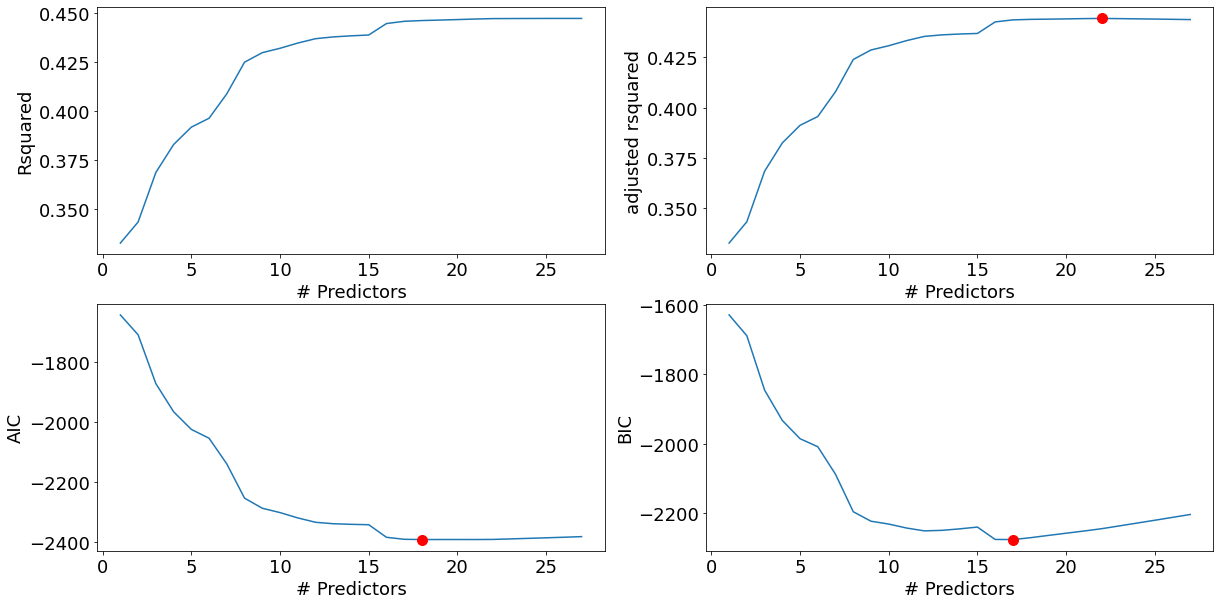

In [44]:
best_sub_plots(models_best_fw)

The model with 17 predictors is the best model based on the AIC criterion, and very close to the best model based on the BIC and adjusted R-squared criteria. Let us select the model with 17 predictors.

In [45]:
best_fwd_reg_model = models_best_fw['model'][17]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AS   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     198.0
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:43:09   Log-Likelihood:                 1213.1
No. Observations:                4201   AIC:                            -2390.
Df Residuals:                    4183   BIC:                            -2276.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2600      0.040      6.567      0.000       0.182       0.338
FT             0.1172      0.016      7.364      0.000       0.086       0.148
PF            -0.0580      0.006     -9.672      0.000      -0.070      -0.046
DRB            0.0170      0.003      5.535      0.000       0.011       0.023
AST            0.0260      0.002     11.953      0.000       0.022       0.030
MP            -0.0052      0.001     -9.573      0.000      -0.006      -0.004
FG             0.1665      0.012     14.146      0.000       0.143       0.190
FGA           -0.0673      0.006    -11.723      0.000      -0.079      -0.056
FGP           -1.0397      0.149     -6.975      0.000      -1.332      -0.747
Age            0.0041      0.001      6.062      0.000       0.003       0.005
BLK            0.0477      0.010      4.713      0.000       0.028       0.068
three_P        0.0099      0.010      1.031      0.303      -0.009       0.029
FTP           -0.1412      0.029     -4.824      0.000      -0.199      -0.084
FTA           -0.0328      0.013     -2.548      0.011      -0.058      -0.008
eFGP           0.3632      0.145      2.513      0.012       0.080       0.647
G              0.0030      0.000      7.343      0.000       0.002       0.004
Tm            -0.0033      0.000     -7.245      0.000      -0.004      -0.002
GS             0.0005      0.000      2.948      0.003       0.000       0.001
==============================================================================
Omnibus:                     1456.501   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8128.749
Skew:                           1.550   Prob(JB):                         0.00
Kurtosis:                       9.068   Cond. No.                     7.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Classification accuracy = 92.8%
Precision = 87.8%
TPR or Recall = 40.9%
FNR = 59.1%
FPR = 0.7%
ROC-AUC = 97.7%


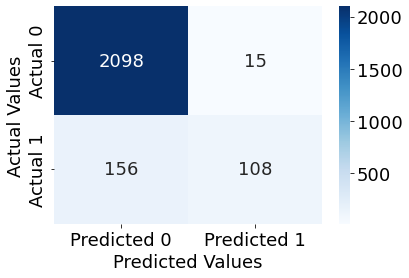

In [46]:
confusion_matrix_data(train_data,train_data.AS,best_fwd_reg_model,CUTOFF)

Classification accuracy = 93.0%
Precision = 76.6%
TPR or Recall = 48.0%
FNR = 52.0%
FPR = 1.7%
ROC-AUC = 97.9%


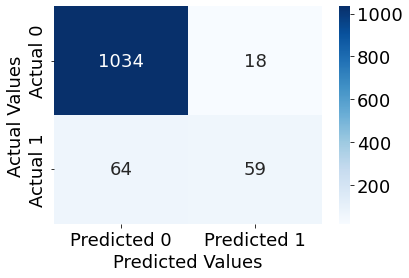

In [47]:
confusion_matrix_data(test_data,test_data.AS,best_fwd_reg_model,CUTOFF)

Classification accuracy = 96.4%
Precision = 70.4%
TPR or Recall = 70.4%
FNR = 29.6%
FPR = 1.9%
ROC-AUC = 84.2%


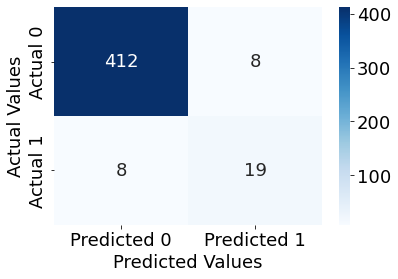

In [48]:
confusion_matrix_year(best_fwd_reg_model, test_2023, true_2023_as_count)

In [49]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [50]:
def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [51]:
models_best_bw = backward_selection()

Processed  27 models on 26 predictors in 0.6108872890472412 seconds.
Processed  26 models on 25 predictors in 0.597381591796875 seconds.
Processed  25 models on 24 predictors in 0.5889194011688232 seconds.
Processed  24 models on 23 predictors in 0.5503790378570557 seconds.
Processed  23 models on 22 predictors in 0.48294520378112793 seconds.
Processed  22 models on 21 predictors in 0.5072309970855713 seconds.
Processed  21 models on 20 predictors in 0.4361560344696045 seconds.
Processed  20 models on 19 predictors in 0.35857439041137695 seconds.
Processed  19 models on 18 predictors in 0.33668017387390137 seconds.
Processed  18 models on 17 predictors in 0.28525400161743164 seconds.
Processed  17 models on 16 predictors in 0.26444435119628906 seconds.
Processed  16 models on 15 predictors in 0.23611664772033691 seconds.
Processed  15 models on 14 predictors in 0.20966243743896484 seconds.
Processed  14 models on 13 predictors in 0.20102190971374512 seconds.
Processed  13 models on 12 

RSADJ.ARGMIN + 1, RSADJ.MIN:  21 0.44449833846701414
AIC.ARGMIN + 1, AIC.MIN:  21 -2392.6322056934323
BIC.ARGMIN + 1, BIC.MIN:  16 -2278.111559030079


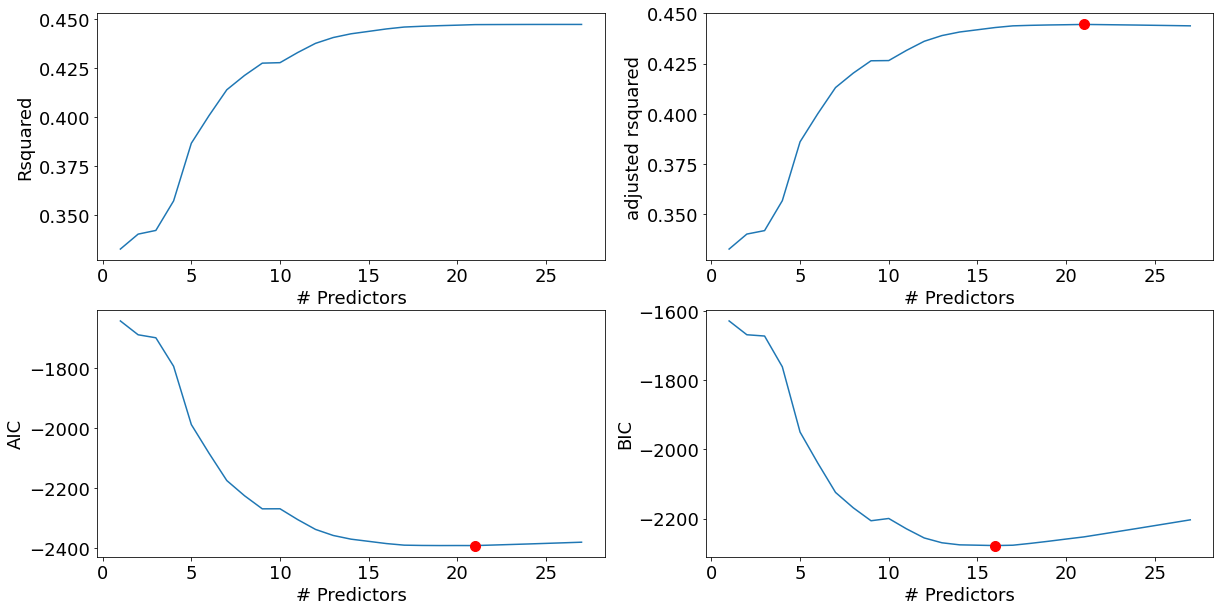

In [52]:
best_sub_plots(models_best_bw)

In [53]:
best_bwd_reg_model = models_best_bw['model'][21]
best_bwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AS   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     161.0
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:43:16   Log-Likelihood:                 1218.3
No. Observations:                4201   AIC:                            -2393.
Df Residuals:                    4179   BIC:                            -2253.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2626      0.040      6.627      0.000       0.185       0.340
Age            0.0041      0.001      5.952      0.000       0.003       0.005
Tm            -0.0034      0.000     -7.457      0.000      -0.004      -0.003
G              0.0031      0.000      7.522      0.000       0.002       0.004
GS             0.0004      0.000      2.681      0.007       0.000       0.001
MP            -0.0053      0.001     -9.640      0.000      -0.006      -0.004
FG             0.1612      0.013     12.688      0.000       0.136       0.186
FGP           -1.0996      0.162     -6.800      0.000      -1.417      -0.783
three_P        0.0416      0.024      1.754      0.079      -0.005       0.088
three_PA      -0.0790      0.009     -8.923      0.000      -0.096      -0.062
three_PP      -0.0426      0.028     -1.527      0.127      -0.097       0.012
two_PA        -0.0638      0.006    -10.093      0.000      -0.076      -0.051
eFGP           0.4390      0.160      2.737      0.006       0.125       0.753
FT             0.1166      0.016      7.244      0.000       0.085       0.148
FTA           -0.0328      0.013     -2.514      0.012      -0.058      -0.007
FTP           -0.1394      0.029     -4.763      0.000      -0.197      -0.082
DRB            0.0305      0.010      3.187      0.001       0.012       0.049
TRB           -0.0108      0.007     -1.458      0.145      -0.025       0.004
AST            0.0238      0.002      9.675      0.000       0.019       0.029
STL            0.0188      0.011      1.785      0.074      -0.002       0.039
BLK            0.0486      0.010      4.770      0.000       0.029       0.069
PF            -0.0581      0.006     -9.436      0.000      -0.070      -0.046
==============================================================================
Omnibus:                     1451.274   Durbin-Watson:                   0.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8055.211
Skew:                           1.546   Prob(JB):                         0.00
Kurtosis:                       9.038   Cond. No.                     8.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Classification accuracy = 92.7%
Precision = 88.0%
TPR or Recall = 39.0%
FNR = 61.0%
FPR = 0.7%
ROC-AUC = 97.8%


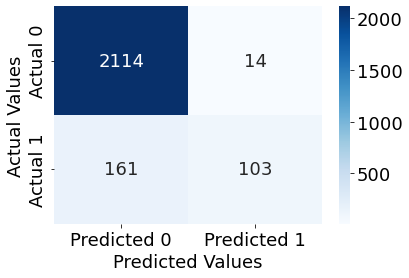

In [54]:
confusion_matrix_data(train_data,train_data.AS,best_bwd_reg_model,CUTOFF)

Classification accuracy = 93.1%
Precision = 77.3%
TPR or Recall = 47.2%
FNR = 52.8%
FPR = 1.6%
ROC-AUC = 97.9%


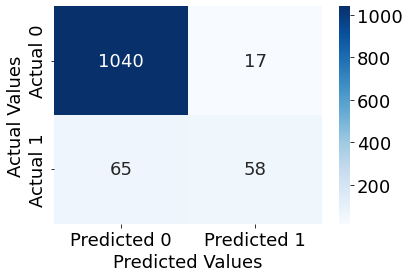

In [55]:
confusion_matrix_data(test_data,test_data.AS,best_bwd_reg_model,CUTOFF)

Classification accuracy = 96.9%
Precision = 74.1%
TPR or Recall = 74.1%
FNR = 25.9%
FPR = 1.7%
ROC-AUC = 86.2%


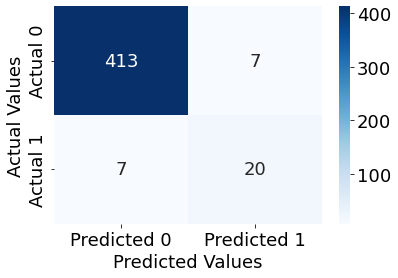

In [56]:
confusion_matrix_year(best_bwd_reg_model, test_2023, true_2023_as_count)

In [57]:
#Create 2*2 Subplot for all_var, forward_one, forward_two, backward



In [58]:
sorted_vif[sorted_vif["VIF"] > 10]

,feature,VIF
7,FGA,9310.884489
27,PTS,6991.302331
13,two_PA,6112.649887
6,FG,4968.362104
21,TRB,2486.557596
12,two_P,1890.365928
10,three_PA,1821.727950
20,DRB,1369.732433
9,three_P,511.054201
16,FT,420.573797


in case of determining players that make it to the all stars, false negatives are more concerning than false positives. This is because if a person has diabetes, and is told that they do not have diabetes, their condition may deteriorate. If a person does not have diabetes, and is told that they have diabetes, they may take unnecessary precautions or tests, but it will not be as harmful to the person as in the previous case. So, in this problem, we will be more focused on reducing the number of false negatives, instead of reducing the false positives or increasing the overall classification accuracy.

We can decrease the cutoff for classifying a person as having diabetes to reduce the number of false negatives.

Note that the changed cut-off reduced the number of false negatives, but at the cost of increasing the false positives. However, the stakeholders may prefer the reduced cut-off to be safer.

In [59]:
best_fwd_reg_model_params = list(best_fwd_reg_model.params.index)
best_bwd_reg_model_params = list(best_bwd_reg_model.params.index)
common_params = set(best_fwd_reg_model_params).intersection(best_bwd_reg_model_params)
common_params.remove("Intercept")
common_params = list(common_params)
print(len(common_params))
logit_model_common_params = sm.logit(formula = 'AS~'+'+'.join(common_params), data = train_data).fit()
logit_model_common_params.summary()

16
Optimization terminated successfully.
         Current function value: 0.073017
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     AS   No. Observations:                 4201
Model:                          Logit   Df Residuals:                     4184
Method:                           MLE   Df Model:                           16
Date:                Tue, 07 Mar 2023   Pseudo R-squ.:                  0.6906
Time:                        14:43:17   Log-Likelihood:                -306.74
converged:                       True   LL-Null:                       -991.44
Covariance Type:            nonrobust   LLR p-value:                6.154e-282
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.3018      3.295     -7.679      0.000     -31.759     -18.844
G             -0.1167      0.033     -3.570      0.000      -0.181      -0.053
MP             0.0487      0.026      1.894      0.058      -0.002       0.099
BLK            0.9890      0.280      3.528      0.000       0.440       1.538
PF            -0.8621      0.226     -3.813      0.000      -1.305      -0.419
DRB            0.2685      0.079      3.383      0.001       0.113       0.424
FTA            0.3604      0.493      0.732      0.464      -0.605       1.326
AST            0.3738      0.054      6.890      0.000       0.267       0.480
three_P       -0.0144      0.434     -0.033      0.974      -0.865       0.837
FTP            3.4235      3.475      0.985      0.325      -3.388      10.235
Age            0.1796      0.030      5.973      0.000       0.121       0.239
FT             0.0699      0.627      0.111      0.911      -1.159       1.299
FGP           -1.3644     13.427     -0.102      0.919     -27.680      24.951
GS             0.0470      0.018      2.603      0.009       0.012       0.082
FG             0.6896      0.132      5.233      0.000       0.431       0.948
Tm             0.1131      0.031      3.614      0.000       0.052       0.174
eFGP           9.3091     13.114      0.710      0.478     -16.393      35.011
==============================================================================

Possibly complete quasi-separation: A fraction 0.53 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Classification accuracy = 96.9%
Precision = 78.5%
TPR or Recall = 69.9%
FNR = 30.1%
FPR = 1.3%
ROC-AUC = 98.5%


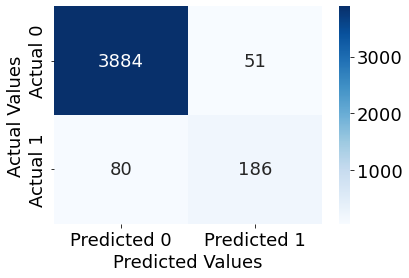

In [60]:
confusion_matrix_data(train_data,train_data.AS,logit_model_common_params,CUTOFF)

Classification accuracy = 96.6%
Precision = 70.9%
TPR or Recall = 72.6%
FNR = 27.4%
FPR = 1.9%
ROC-AUC = 98.5%


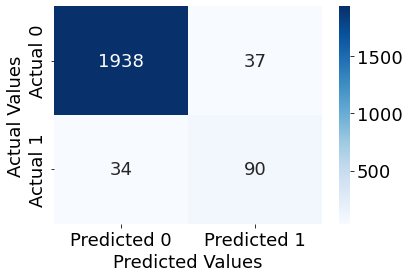

In [61]:
confusion_matrix_data(test_data,test_data.AS,logit_model_common_params,CUTOFF)

In [62]:
insignificant_params = ['FTP', 'FGP', 'FTA', 'FT', 'eFGP', 'three_P']

final_params = [p for p in common_params if p not in insignificant_params]
print(final_params)
logit_model_remove_insig = sm.logit(formula = 'AS~'+'+'.join(final_params), data = train_data).fit() #Developing logistic regression model
logit_model_remove_insig.summary()

['G', 'MP', 'BLK', 'PF', 'DRB', 'AST', 'Age', 'GS', 'FG', 'Tm']
Optimization terminated successfully.
         Current function value: 0.078249
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     AS   No. Observations:                 4201
Model:                          Logit   Df Residuals:                     4190
Method:                           MLE   Df Model:                           10
Date:                Tue, 07 Mar 2023   Pseudo R-squ.:                  0.6684
Time:                        14:43:17   Log-Likelihood:                -328.72
converged:                       True   LL-Null:                       -991.44
Covariance Type:            nonrobust   LLR p-value:                1.234e-278
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.2317      1.667    -11.540      0.000     -22.498     -15.965
G             -0.1267      0.033     -3.814      0.000      -0.192      -0.062
MP             0.0574      0.025      2.323      0.020       0.009       0.106
BLK            1.0133      0.250      4.050      0.000       0.523       1.504
PF            -0.7510      0.216     -3.482      0.000      -1.174      -0.328
DRB            0.2961      0.073      4.042      0.000       0.153       0.440
AST            0.4030      0.052      7.822      0.000       0.302       0.504
Age            0.1823      0.028      6.492      0.000       0.127       0.237
GS             0.0446      0.019      2.363      0.018       0.008       0.082
FG             0.9652      0.082     11.767      0.000       0.804       1.126
Tm             0.1238      0.031      3.950      0.000       0.062       0.185
==============================================================================

Possibly complete quasi-separation: A fraction 0.52 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Classification accuracy = 96.3%
Precision = 73.9%
TPR or Recall = 65.0%
FNR = 35.0%
FPR = 1.6%
ROC-AUC = 98.3%


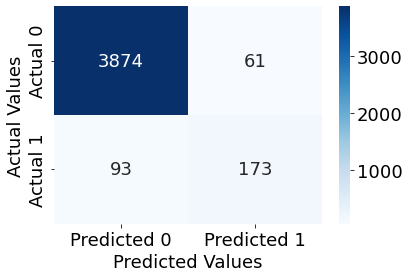

In [63]:
confusion_matrix_data(train_data,train_data.AS,logit_model_remove_insig,CUTOFF)

Classification accuracy = 96.2%
Precision = 69.3%
TPR or Recall = 63.7%
FNR = 36.3%
FPR = 1.8%
ROC-AUC = 98.2%


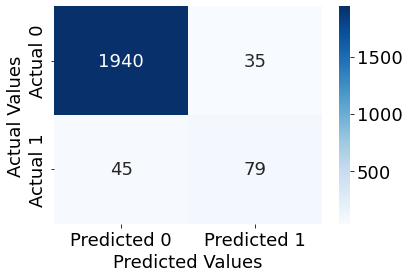

In [64]:
confusion_matrix_data(test_data,test_data.AS,logit_model_remove_insig,CUTOFF)

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from collections import defaultdict

accuracy_dict = defaultdict(list)
precision_dict = defaultdict(list)


def confusion_matrix_multi(model_list, label_list, test_ds, as_count):
    fig, axs = plt.subplots(3, 2, figsize=(24, 20))
    plt.subplots_adjust(hspace  = 0.8)
    axs = axs.ravel()
    
    for i, model in enumerate(model_list):
        # Assume new_data is a dataframe containing the predictor variables for the new observations
        pred_probs = model.predict(test_ds)  # Predict the probabilities of AS=1 for each observation
        pred_probs_sorted = pred_probs.sort_values(ascending=False)  # Sort the probabilities in descending order
        top_indices = pred_probs_sorted.head(as_count).index  # Get the indices of the top n observations with the highest probabilities
        predicted_classes = pd.Series(0, index=test_ds.index)  # Create a Series to store the predicted classes (0 or 1) for each observation
        predicted_classes.loc[top_indices] = 1  # Set the top n predicted classes to 1, and the rest to 0
        true_values = test_ds['AS']
        confusion = pd.DataFrame(confusion_matrix(true_values, predicted_classes))
        confusion.columns = ['Predicted 0', 'Predicted 1']
        confusion = confusion.rename(index={0: 'Actual 0',1: 'Actual 1'})
        cm = np.array(confusion)
        # Calculate the performance metrics
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
        precision = (cm[1,1])/(cm[0,1]+cm[1,1])
        fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
        tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
        fpr_roc, tpr_roc, auc_thresholds = roc_curve(true_values, predicted_classes)
        auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
        # Create the heatmap of the confusion matrix
        sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', ax=axs[i])
        axs[i].set_ylabel("Actual Values")
        axs[i].set_xlabel("Predicted Values")
        axs[i].set_title(label_list[i])
        # Print the performance metrics
        axs[i].text(0, 1.50, "Classification accuracy = {:.1%}".format(accuracy), horizontalalignment='left', transform=axs[i].transAxes)
        axs[i].text(0, 1.42, "Precision = {:.1%}".format(precision), horizontalalignment='left', transform=axs[i].transAxes)
        axs[i].text(0, 1.34, "TPR or Recall = {:.1%}".format(tpr), horizontalalignment='left', transform=axs[i].transAxes)
        axs[i].text(0, 1.26, "FNR = {:.1%}".format(fnr), horizontalalignment='left', transform=axs[i].transAxes)
        axs[i].text(0, 1.18, "FPR = {:.1%}".format(fpr), horizontalalignment='left', transform=axs[i].transAxes)
        axs[i].text(0, 1.1, "ROC-AUC = {:.1%}".format(auc_value), horizontalalignment='left', transform=axs[i].transAxes)
        
        accuracy_dict[label_list[i]].append(accuracy)
        precision_dict[label_list[i]].append(precision)


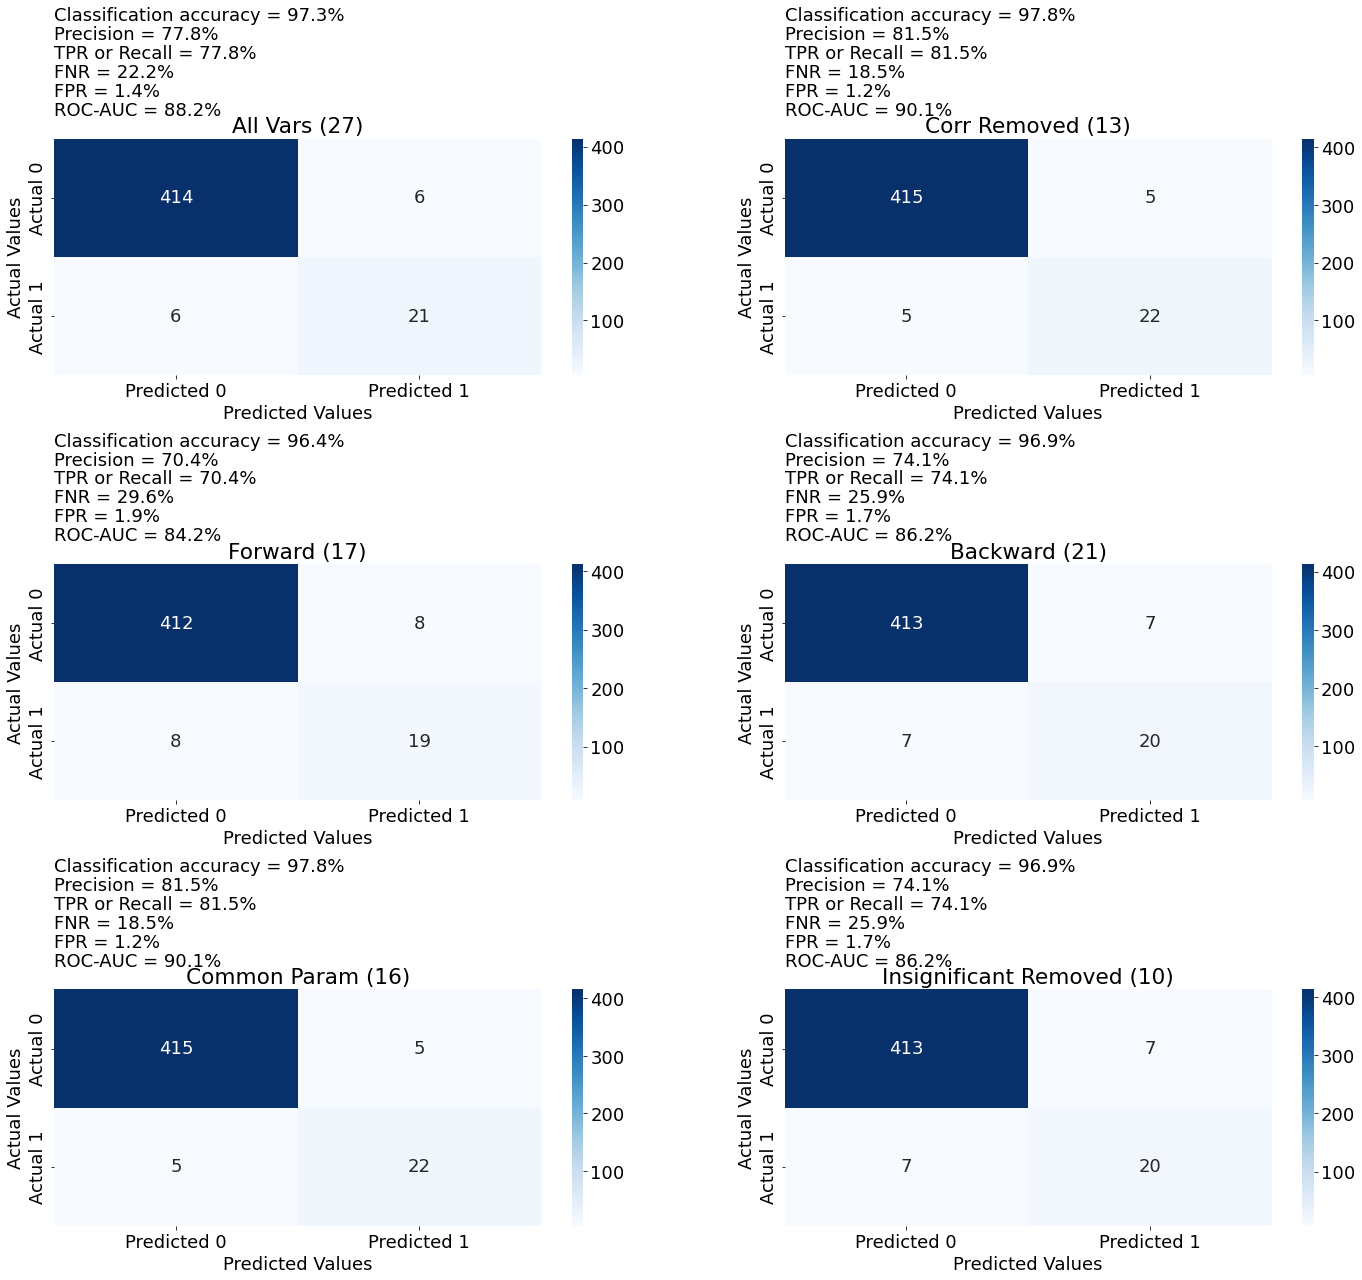

In [66]:
model_list = [logit_model_including_all, logit_model_less_corr, best_fwd_reg_model, best_bwd_reg_model, logit_model_common_params, logit_model_remove_insig]
label_list = ["All Vars (27)", "Corr Removed (13)", "Forward (17)", "Backward (21)", "Common Param (16)", "Insignificant Removed (10)"]
confusion_matrix_multi(model_list, label_list, test_2023, true_2023_as_count)

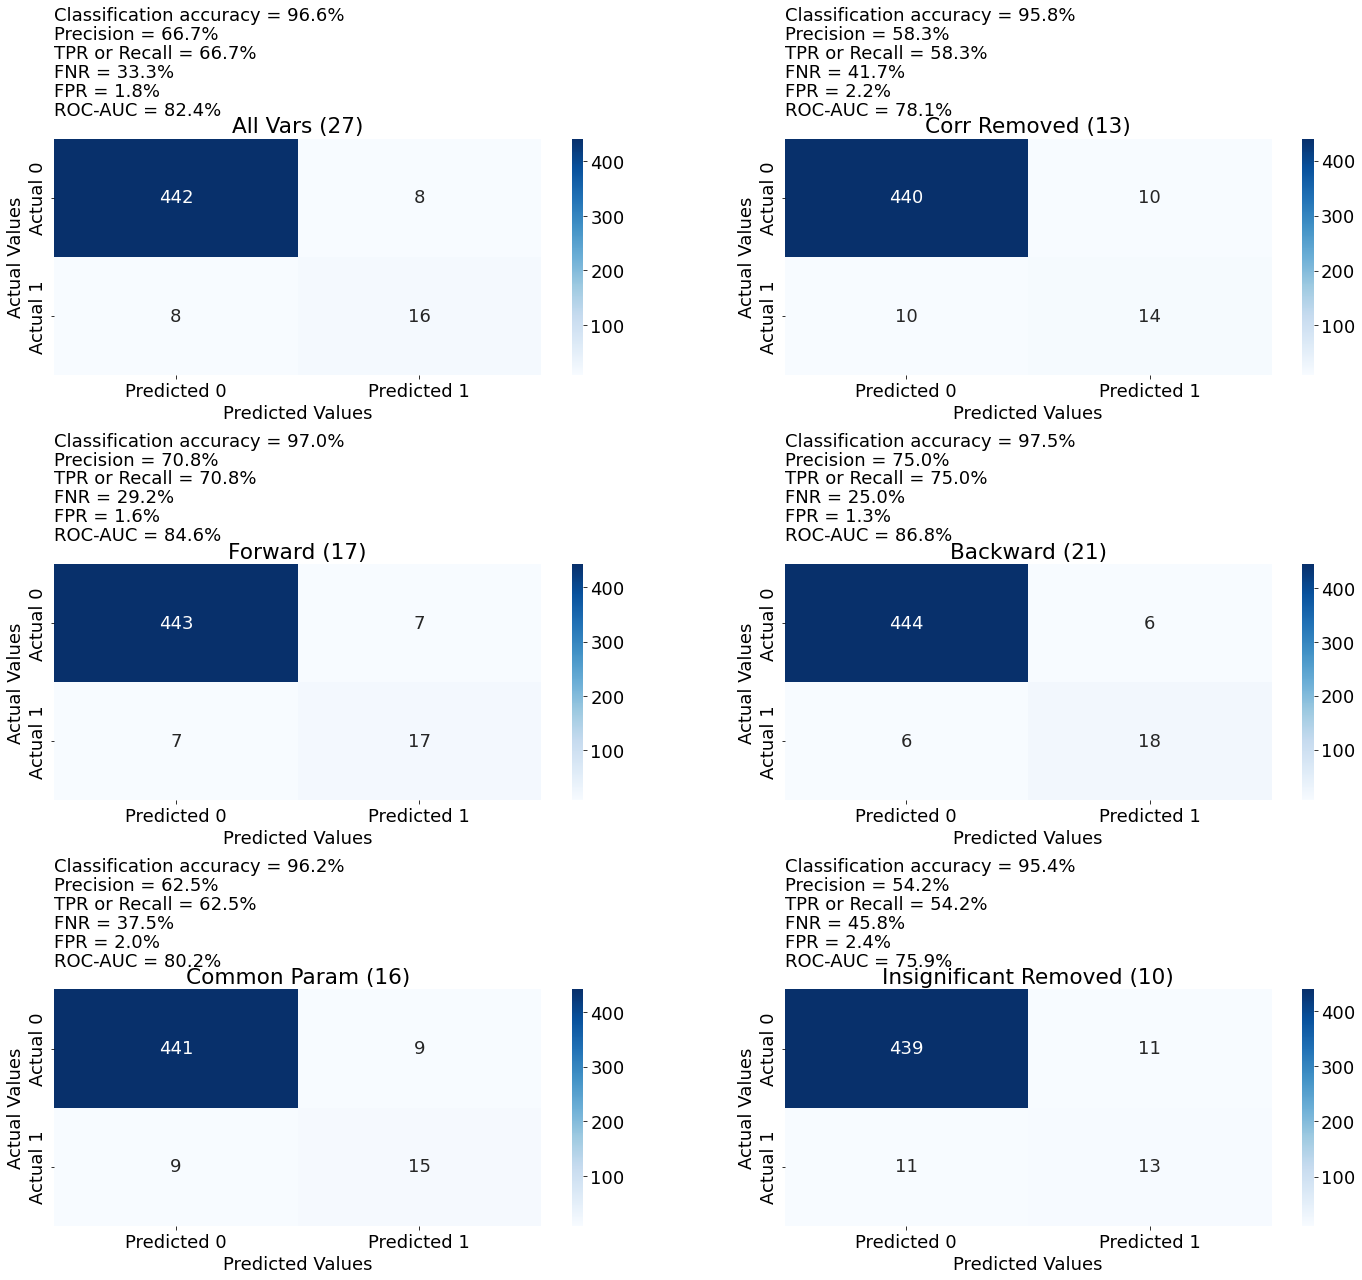

In [67]:
confusion_matrix_multi(model_list, label_list, test_2020, true_2020_as_count)

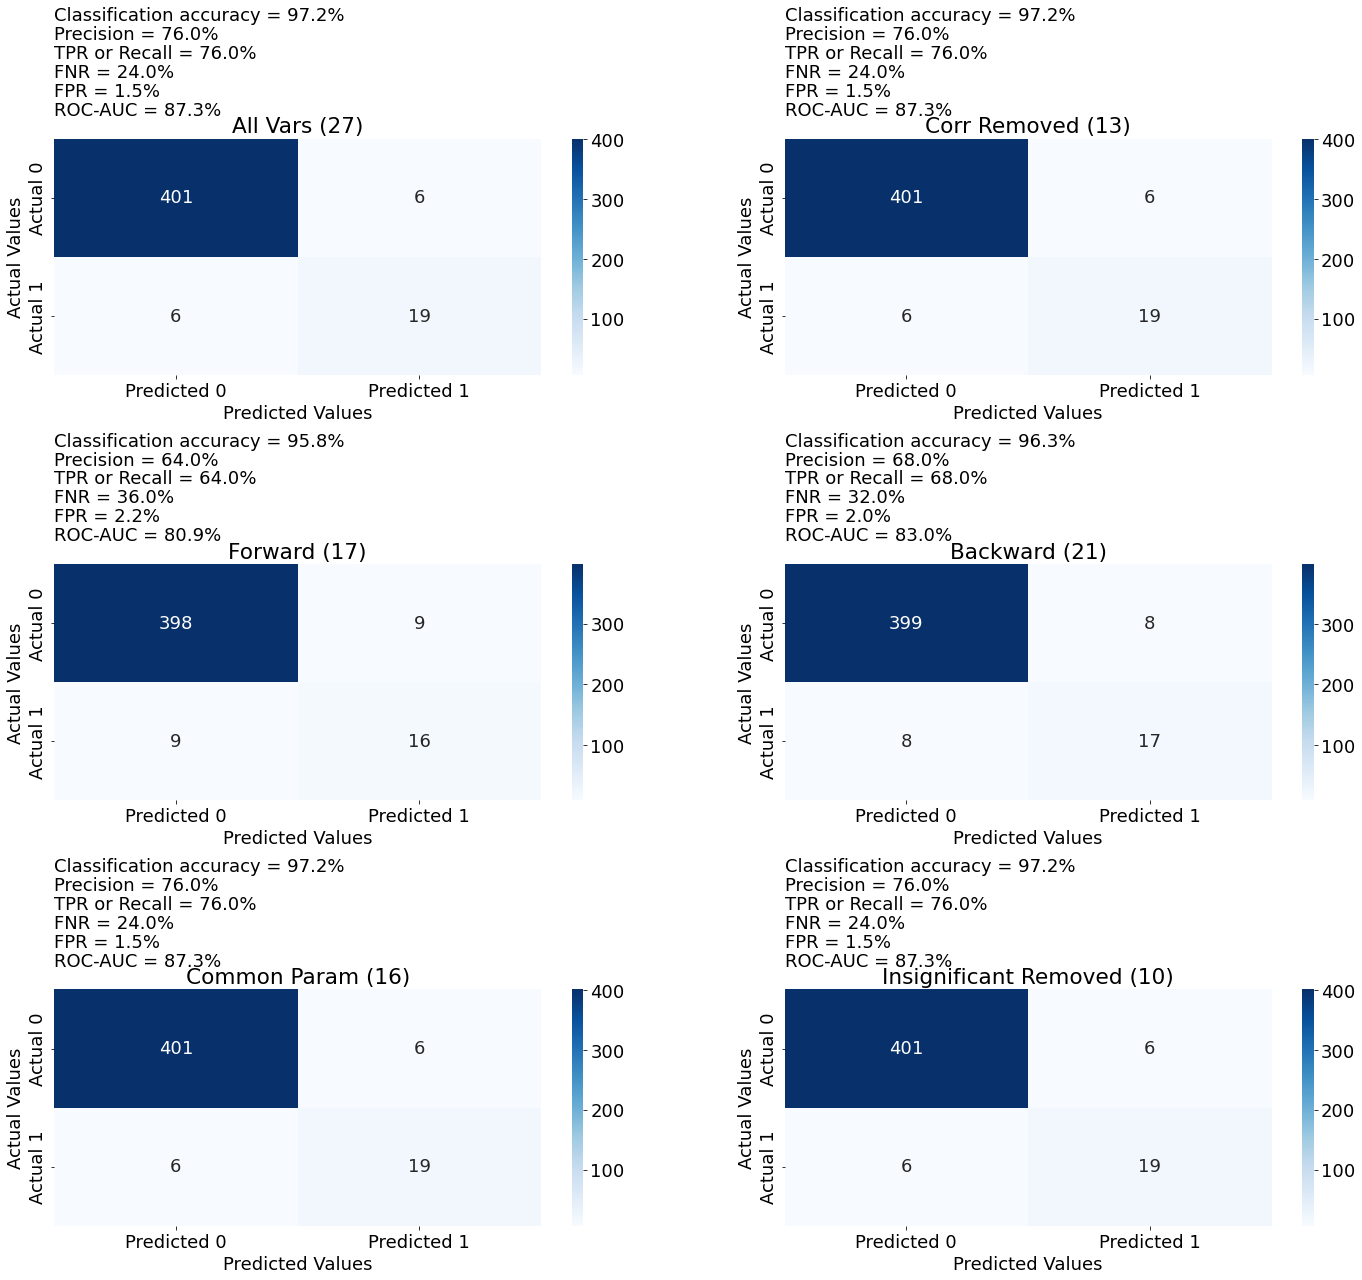

In [68]:
confusion_matrix_multi(model_list, label_list, test_2017, true_2017_as_count)

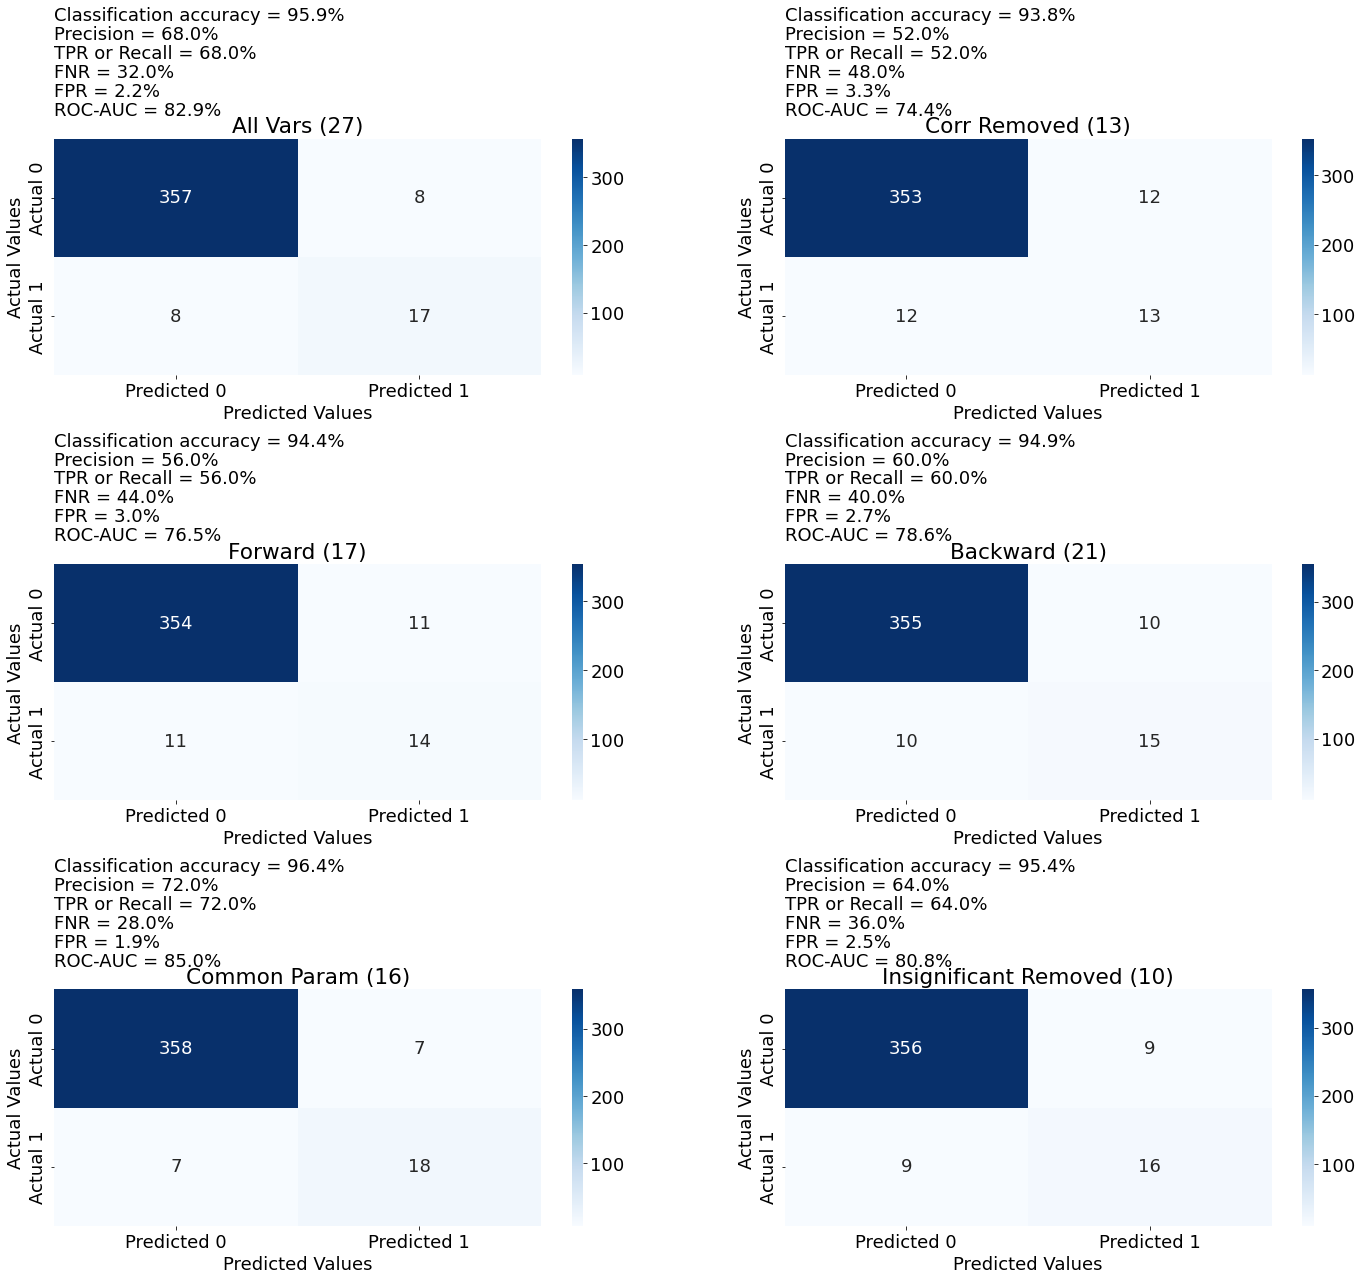

In [69]:
confusion_matrix_multi(model_list, label_list, test_2014, true_2014_as_count)

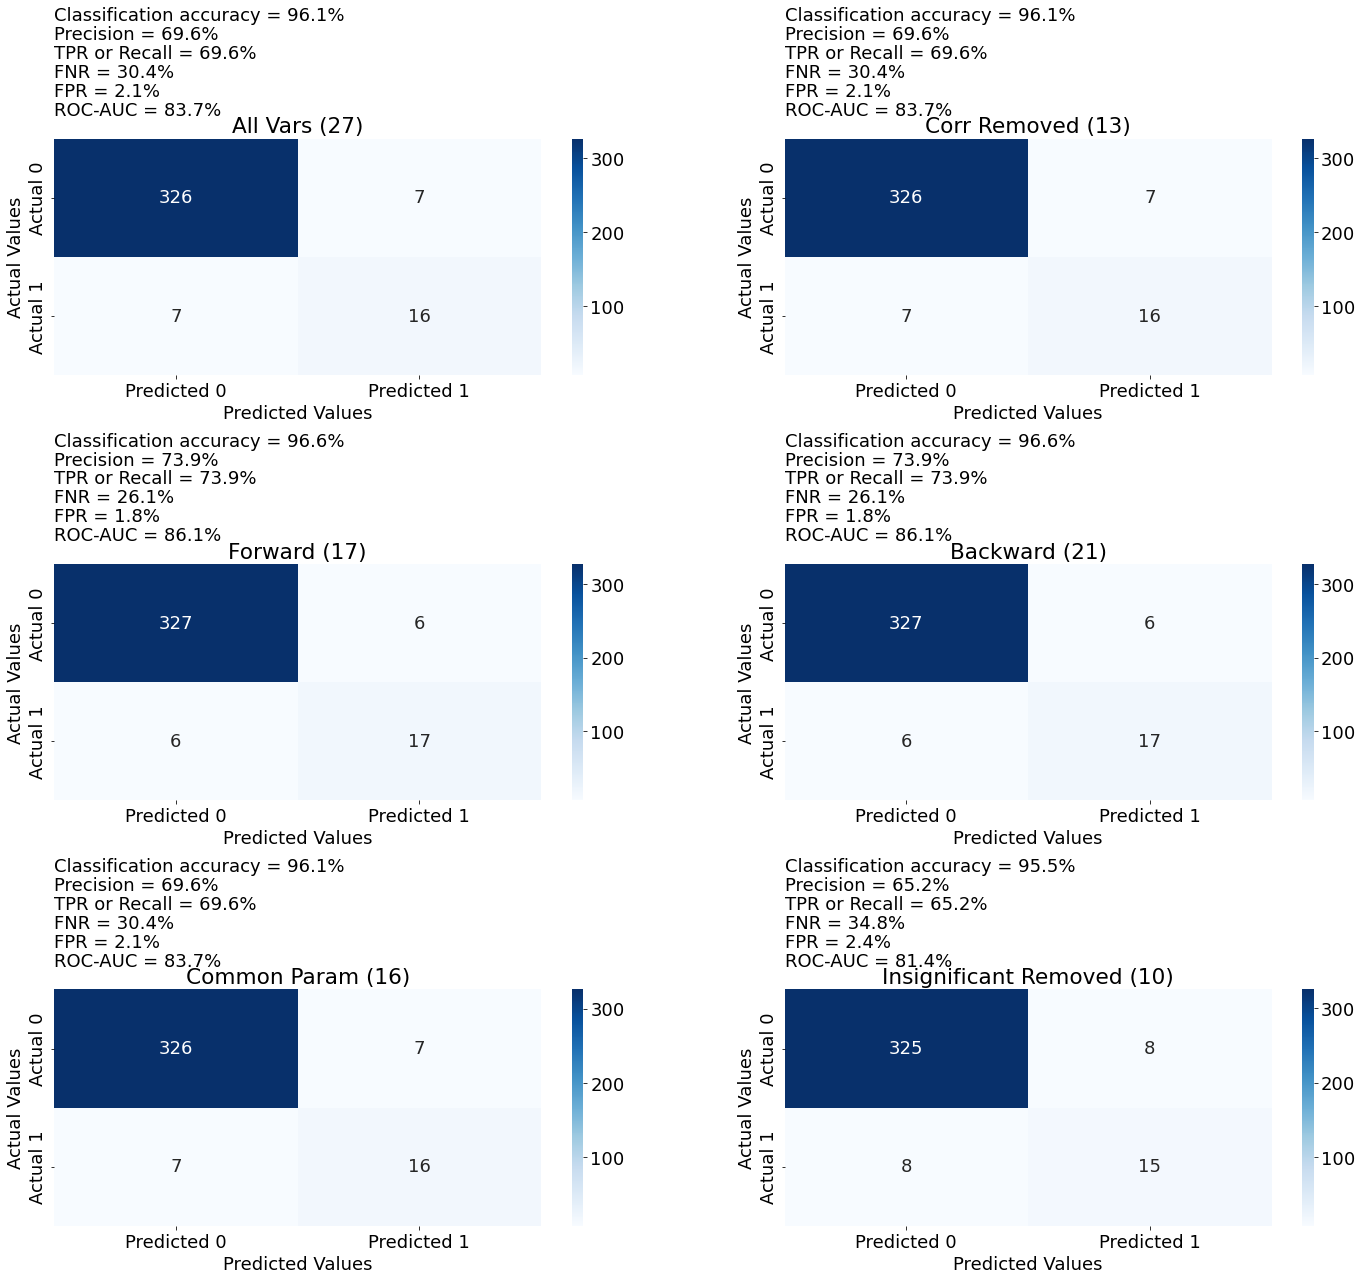

In [70]:
confusion_matrix_multi(model_list, label_list, test_2011, true_2011_as_count)

In [78]:
avg_accuracy = dict()
for key, lst in accuracy_dict.items():
    maximum, minimum = max(lst) * 100, min(lst) * 100
    avg_num = sum(lst) / len(lst) * 100
    maxi, avg, mini = "{:.2f}%".format(maximum), "{:.2f}%".format(avg_num), "{:.2f}%".format(minimum)
    avg_accuracy[key] = [maxi, avg, mini]

avg_accuracy_sorted = dict(sorted(avg_accuracy.items(), key=lambda item: item[1][1], reverse=True))
avg_accuracy_sorted

{'Common Param (16)': ['97.76%', '96.73%', '96.07%'],
 'All Vars (27)': ['97.32%', '96.63%', '95.90%'],
 'Backward (21)': ['97.47%', '96.43%', '94.87%'],
 'Corr Removed (13)': ['97.76%', '96.14%', '93.85%'],
 'Insignificant Removed (10)': ['97.22%', '96.07%', '95.36%'],
 'Forward (17)': ['97.05%', '96.06%', '94.36%']}

In [72]:
avg_precision = dict()
for key, lst in precision_dict.items():
    maximum, minimum = max(lst) * 100, min(lst) * 100
    avg_num = sum(lst) / len(lst) * 100
    maxi, avg, mini = "{:.2f}%".format(maximum), "{:.2f}%".format(avg_num), "{:.2f}%".format(minimum)
    avg_precision[key] = [maxi, avg, mini]

avg_precision_sorted = dict(sorted(avg_precision.items(), key=lambda item: item[1][1], reverse=True))
avg_precision_sorted

{'Common Param (16)': ['81.48%', '72.31%', '62.50%'],
 'All Vars (27)': ['77.78%', '71.60%', '66.67%'],
 'Backward (21)': ['75.00%', '70.20%', '60.00%'],
 'Corr Removed (13)': ['81.48%', '67.48%', '52.00%'],
 'Forward (17)': ['73.91%', '67.02%', '56.00%'],
 'Insignificant Removed (10)': ['76.00%', '66.69%', '54.17%']}

In [73]:
# Complete Data for 2023
def get_result(data, count):
    pred_probs = logit_model_common_params.predict(data)  # Predict the probabilities of AS=1 for each observation
    pred_probs_sorted = pred_probs.sort_values(ascending=False)  # Sort the probabilities in descending order
    top_indices = pred_probs_sorted.head(count).index  # Get the indices of the top n observations with the highest probabilities
    predicted_classes = pd.Series(0, index=data.index)  # Create a Series to store the predicted classes (0 or 1) for each observation
    predicted_classes.loc[top_indices] = 1
    data["Predicted_AS"] = predicted_classes

    correct_prediction = data[(data['AS'] == 1) & (data['Predicted_AS'] == 1)]['Player']
    false_positives = data[(data['AS'] == 0) & (data['Predicted_AS'] == 1)]['Player']
    false_negatives = data[(data['AS'] == 1) & (data['Predicted_AS'] == 0)]['Player']
    print("Correct: \n", correct_prediction)
    print("FP: \n", false_positives)
    print("FN: \n", false_negatives)

get_result(test_2023, true_2023_as_count)

Correct: 
 5928             Damian Lillard
5940               De'Aaron Fox
5958           Domantas Sabonis
5960           Donovan Mitchell
6079              Julius Randle
6116               Kyrie Irving
6120            Lauri Markkanen
6180              Pascal Siakam
6186                Paul George
6218    Shai Gilgeous-Alexander
6255          Tyrese Haliburton
6278              DeMar DeRozan
6282      Giannis Antetokounmpo
6283                  Ja Morant
6285               Jayson Tatum
6287                Joel Embiid
6289               Kevin Durant
6292               LeBron James
6293                Luka Doncic
6294               Nikola Jokic
6296              Stephen Curry
6299            Zion Williamson
Name: Player, dtype: object
FP: 
 5871    Anthony Davis
6032     James Harden
6085    Kawhi Leonard
6286     Jimmy Butler
6297       Trae Young
Name: Player, dtype: object
FN: 
 5872      Anthony Edwards
5878          Bam Adebayo
6035    Jaren Jackson Jr.
6041         Jaylen Brown
607

C:\Users\msbow\AppData\Local\Temp\ipykernel_19816\1320667295.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Predicted_AS"] = predicted_classes


In [74]:
get_result(test_2020, true_2020_as_count)

Correct: 
 4844            Anthony Davis
4848               Chris Paul
4849           Damian Lillard
4850             Devin Booker
4853    Giannis Antetokounmpo
4854             James Harden
4856             Jimmy Butler
4857              Joel Embiid
4858            Kawhi Leonard
4861               Kyle Lowry
4862             LeBron James
4863              Luka Doncic
4864             Nikola Jokic
4866        Russell Westbrook
4867               Trae Young
Name: Player, dtype: object
FP: 
 4430          Bradley Beal
4488         DeMar DeRozan
4556      Hassan Whiteside
4637    Karl-Anthony Towns
4649            Kevin Love
4661          Kyrie Irving
4662     LaMarcus Aldridge
4729        Nikola Vucevic
4841           Zach LaVine
Name: Player, dtype: object
FN: 
 4845         Bam Adebayo
4846         Ben Simmons
4847      Brandon Ingram
4851    Domantas Sabonis
4852    Donovan Mitchell
4855        Jayson Tatum
4859        Kemba Walker
4860     Khris Middleton
4865       Pascal Siakam
Nam

C:\Users\msbow\AppData\Local\Temp\ipykernel_19816\1320667295.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Predicted_AS"] = predicted_classes


In [75]:
get_result(test_2017, true_2017_as_count)

Correct: 
 3454            Anthony Davis
3457            DeMar DeRozan
3458         DeMarcus Cousins
3460    Giannis Antetokounmpo
3461           Gordon Hayward
3462            Isaiah Thomas
3463             James Harden
3464             Jimmy Butler
3465                John Wall
3466            Kawhi Leonard
3467             Kemba Walker
3468             Kevin Durant
3471               Kyle Lowry
3472             Kyrie Irving
3473             LeBron James
3474               Marc Gasol
3475              Paul George
3477        Russell Westbrook
3478            Stephen Curry
Name: Player, dtype: object
FP: 
 3080         Blake Griffin
3107            Chris Paul
3116        Damian Lillard
3254    Karl-Anthony Towns
3315           Mike Conley
3376           Rudy Gobert
Name: Player, dtype: object
FN: 
 3455    Carmelo Anthony
3456     DeAndre Jordan
3459     Draymond Green
3469         Kevin Love
3470      Klay Thompson
3476       Paul Millsap
Name: Player, dtype: object


C:\Users\msbow\AppData\Local\Temp\ipykernel_19816\1320667295.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Predicted_AS"] = predicted_classes


In [76]:
get_result(test_2014, true_2014_as_count)

Correct: 
 2209        Anthony Davis
2210        Blake Griffin
2211      Carmelo Anthony
2213           Chris Paul
2215        DeMar DeRozan
2216        Dirk Nowitzki
2217        Dwight Howard
2218          Dwyane Wade
2219         James Harden
2222            John Wall
2223         Kevin Durant
2224           Kevin Love
2227    LaMarcus Aldridge
2228         LeBron James
2229          Paul George
2230         Paul Millsap
2232        Stephen Curry
2233          Tony Parker
Name: Player, dtype: object
FP: 
 1848        Al Jefferson
1927    DeMarcus Cousins
1970        Goran Dragic
2096         Monta Ellis
2117           Pau Gasol
2174          Tim Duncan
2188           Ty Lawson
Name: Player, dtype: object
FN: 
 2212        Chris Bosh
2214    Damian Lillard
2220       Joakim Noah
2221       Joe Johnson
2225       Kobe Bryant
2226      Kyrie Irving
2231       Roy Hibbert
Name: Player, dtype: object


C:\Users\msbow\AppData\Local\Temp\ipykernel_19816\1320667295.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Predicted_AS"] = predicted_classes


In [77]:
get_result(test_2011, true_2011_as_count)

Correct: 
 1046    Amar'e Stoudemire
1047        Blake Griffin
1050           Chris Paul
1052         Derrick Rose
1053        Dirk Nowitzki
1054        Dwight Howard
1055          Dwyane Wade
1057         Kevin Durant
1058        Kevin Garnett
1059           Kevin Love
1060          Kobe Bryant
1061         LeBron James
1062            Pau Gasol
1063          Paul Pierce
1066    Russell Westbrook
1067           Tim Duncan
Name: Player, dtype: object
FP: 
 898          Kevin Martin
907     LaMarcus Aldridge
926         Manu Ginóbili
949           Monta Ellis
1008           Steve Nash
1020          Tony Parker
1043        Zach Randolph
Name: Player, dtype: object
FN: 
 1045         Al Horford
1048    Carmelo Anthony
1049         Chris Bosh
1051     Deron Williams
1056        Joe Johnson
1064        Rajon Rondo
1065          Ray Allen
Name: Player, dtype: object


C:\Users\msbow\AppData\Local\Temp\ipykernel_19816\1320667295.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Predicted_AS"] = predicted_classes
